In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.dpi'] = 150
plt.rcParams['figure.figsize'] = (10,5)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Read data
df = pd.read_csv('https://raw.githubusercontent.com/Shrikrishna-jadhavar/Data-Science-Material/main/Dataset/NewspaperData.csv')
df

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [ ]:
#Select relevant columns

In [3]:
df[['daily']]

,daily
0,391.952
1,516.981
2,355.628
3,238.555
4,537.780
5,733.775
6,198.832
7,252.624
8,206.204
9,231.177


In [4]:
df = df[['daily','sunday']]
df

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093
5,733.775,1133.249
6,198.832,348.744
7,252.624,417.779
8,206.204,344.522
9,231.177,323.084


In [ ]:
#Correlation analysis

<Axes: xlabel='daily', ylabel='sunday'>

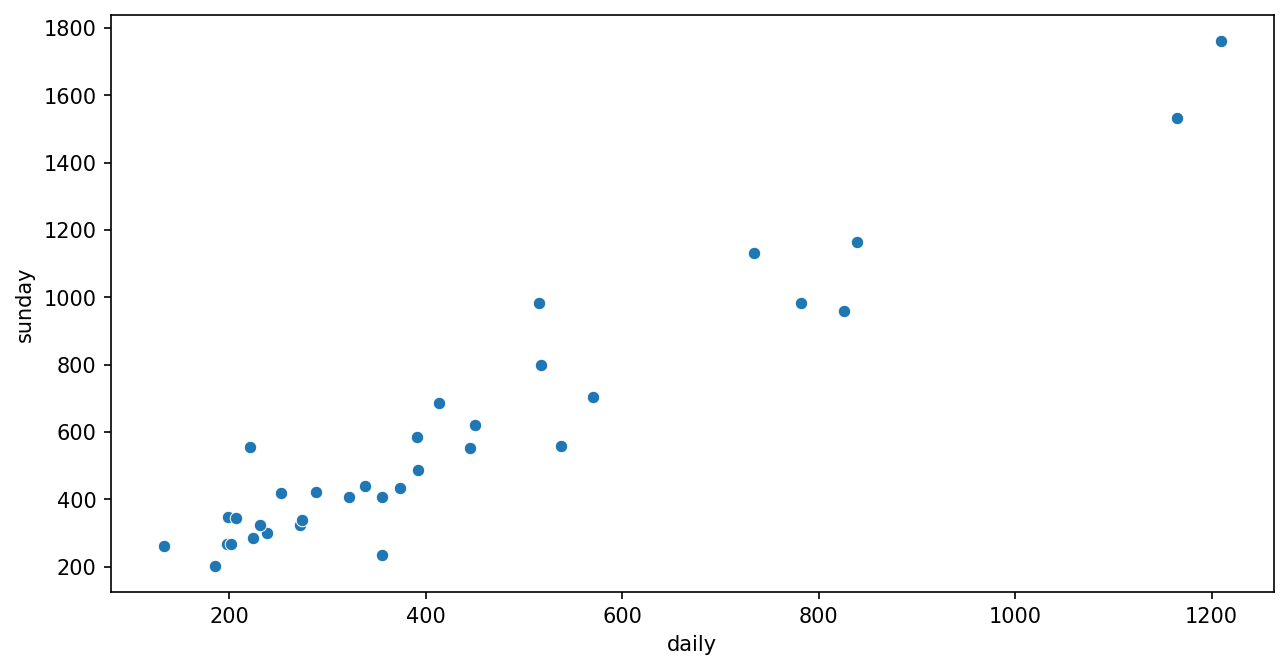

In [5]:
sns.scatterplot(x = df['daily'],y = df['sunday'])

In [6]:
df.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


<Axes: >

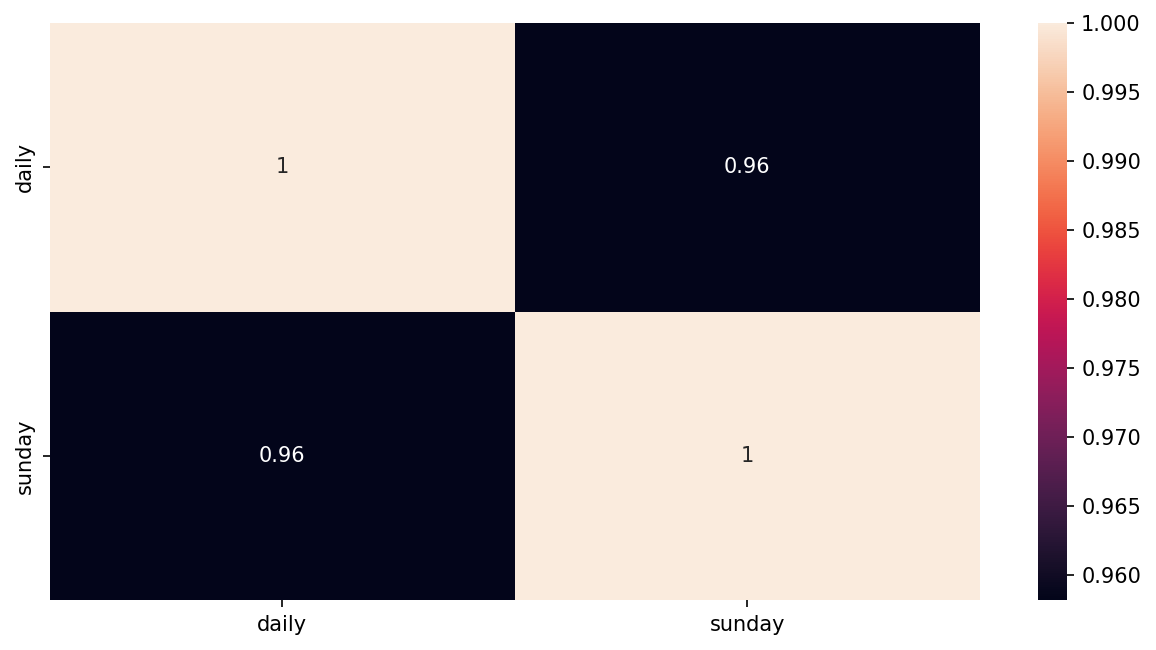

In [7]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
#Import statsmodels

In [8]:
import statsmodels.formula.api as smf

In [9]:
model = smf.ols('sunday~daily',data=df).fit()
model

In [10]:
#Model parameters (slope, intercept)
model.params

,0
Intercept,13.835630
daily,1.339715


In [11]:
df.head()

,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093


In [12]:
#line equation
c = 13.83
m = 1.33
daily = 450

sunday = m*daily+c
sunday

612.33

In [13]:
#r2 value
model.rsquared

0.9180596895873295

# Prediction for new data

In [14]:
data = {
    'Name': ['A','B','C'],
    'Age' : [23,22,21],
    'Location':['Pune','Mumbai','Goa']
}

data
type(data)

dict

In [15]:
pd.DataFrame(data)

,Name,Age,Location
0,A,23,Pune
1,B,22,Mumbai
2,C,21,Goa


In [16]:
pd.DataFrame({
    'Name': ['A','B','C'],
    'Age' : [23,22,21],
    'Location':['Pune','Mumbai','Goa']
})

,Name,Age,Location
0,A,23,Pune
1,B,22,Mumbai
2,C,21,Goa


In [17]:
test = pd.DataFrame({
    'daily' : [102,552,850,654,759,789,654,999]
})
test

,daily
0,102
1,552
2,850
3,654
4,759
5,789
6,654
7,999


In [18]:
model.predict(test)

,0
0,150.486535
1,753.358176
2,1152.593174
3,890.009081
4,1030.679131
5,1070.870574
6,890.009081
7,1352.210673
